In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [63]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [64]:
df = df.dropna()

In [69]:
mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

df["EngagementLevel"] = df["EngagementLevel"].map(mapping)
df['EngagementLevel']

0        1
1        1
2        2
3        1
4        1
        ..
40029    1
40030    2
40031    2
40032    1
40033    1
Name: EngagementLevel, Length: 40034, dtype: int64

In [70]:

gender_mapping = {
    "Male": 0,
    "Female": 1
}

location_mapping = {
    "USA": 0,
    "Europe": 1,
    "Other": 2,
    "Asia": 3
}

game_genre_mapping = {
    "Action": 0,
    "Strategy": 1,
    "Sports": 2,
    "RPG": 3,
    "Simulation": 4
}

difficulty_mapping = {
    "Easy": 0,
    "Medium": 1,
    "Hard": 2
}

df["Gender"] = df["Gender"].map(gender_mapping)
df["Location"] = df["Location"].map(location_mapping)
df["GameGenre"] = df["GameGenre"].map(game_genre_mapping)
df["GameDifficulty"] = df["GameDifficulty"].map(difficulty_mapping)



In [71]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,2,1,16.271119,0,1,6,108,79,25,1
1,9001,29,1,0,1,5.525961,0,1,5,144,11,10,1
2,9002,22,1,0,2,8.223755,0,0,16,142,35,41,2
3,9003,35,0,0,0,5.265351,1,0,9,85,57,47,1
4,9004,33,0,1,0,15.531945,0,1,2,131,95,37,1


In [72]:
features = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
            'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
            'Gender', 'Location', 'GameGenre', 'GameDifficulty']

X = df[features]
y = df["EngagementLevel"]


In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [75]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
}

In [76]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),  # масштабуємо
        ("classifier", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    
    results.append({"Model": name, "Accuracy": round(acc, 3)})

In [77]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n Рейтинг моделей за точністю:\n")
print(results_df)

best_model_name = results_df.iloc[0]["Model"]
print(f"\nНайкраща модель за точністю: {best_model_name}")


 Рейтинг моделей за точністю:

                 Model  Accuracy
3        Random Forest     0.910
4                  SVM     0.895
5          Naive Bayes     0.842
2        Decision Tree     0.833
0  Logistic Regression     0.821
1                  KNN     0.764

Найкраща модель за точністю: Random Forest


In [78]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)


joblib.dump(best_model, "model.pkl")

joblib.dump(scaler, "scaler.pkl")
print("✅ Модель та scaler збережено!")

✅ Модель та scaler збережено!


Confusion Matrix:
 [[1834  200   59]
 [ 114 3673   92]
 [  70  187 1778]]


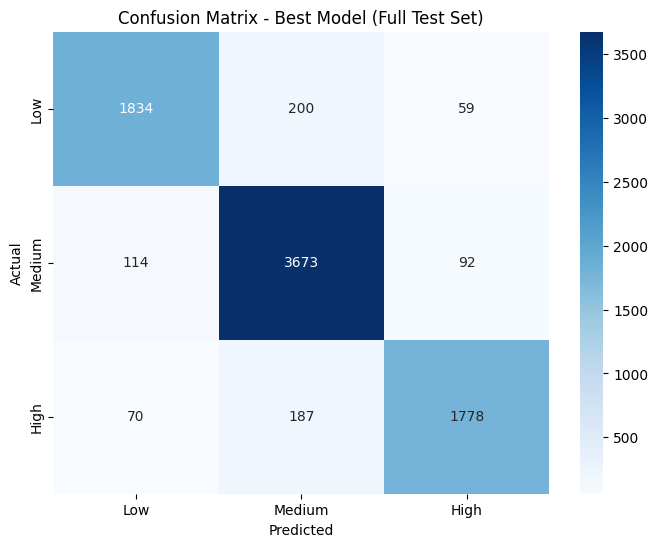

In [79]:
cm1 = confusion_matrix(y_test, best_model.predict(X_test))
print("Confusion Matrix:\n", cm1)

# Візуалізація матриці конфузії
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Model (Full Test Set)')
plt.show()

In [80]:
best_model_loaded = joblib.load("model.pkl")
sample_prediction = best_model_loaded.predict(X_test[:50])
accuracy = accuracy_score(y_test[:50], sample_prediction)
print(f"\nПеревірка завантаженої моделі, точність на 50 зразках: {accuracy}\n")


Перевірка завантаженої моделі, точність на 50 зразках: 0.88



Confusion Matrix:
 [[13  1  1]
 [ 2 18  1]
 [ 0  1 13]]


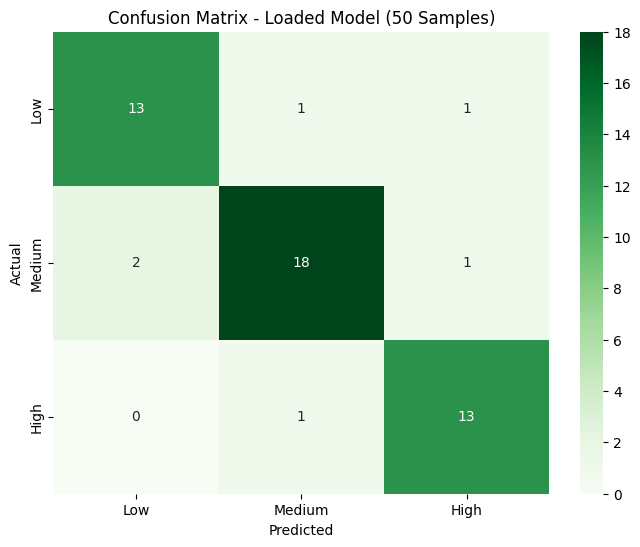

In [81]:
cm = confusion_matrix(y_test[:50], sample_prediction)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Loaded Model (50 Samples)')
plt.show()

In [11]:
df_new = pd.read_csv('online_gaming_behavior_dataset.csv')

# Видаляємо випадкові 40% даних (залишаємо 60%)
df_new = df_new.sample(frac=0.1, random_state=42)

print(f"Залишилось рядків: {len(df_new)}")
df_new.head()

df_new.to_csv('new_online_gaming_behavior_dataset.csv', index=False)

Залишилось рядків: 4003
